# Enhanced ODER Interactive Playground
Purpose: Interactive companion to main ODER paper with comprehensive validation








In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


# 1. Enhanced Setup and Configuration

In [2]:
# Enhanced configuration
TOKEN_DURATION_MS = 400
COLLAPSE_THRESHOLD = 0.95
SLOPE_CUTOFF = 0.01
N_BOOTSTRAP = 100  # Lighter for interactive use

print("🚀 Enhanced ODER Interactive Playground")
print("=" * 50)
print("Features: Advanced diagnostics, observer comparison, comprehensive stress testing")


🚀 Enhanced ODER Interactive Playground
Features: Advanced diagnostics, observer comparison, comprehensive stress testing


# 2. User Input with Enhanced Options

In [3]:
# Enhanced user entry with validation
user_sentence = "The old man the boats."  # Or via input()
user_language = "English"  # or "Aurian"
observer_class = "O3"  # Options: "O1", "O3"
collapse_threshold = 0.95
token_duration_ms = 400
stress_test = True
run_comparison_mode = True  # New: Compare O1 vs O3
export_session = True  # New: Export for further analysis

print(f"📝 Input sentence: '{user_sentence}'")
print(f"🌍 Language: {user_language}")
print(f"👤 Observer class: {observer_class}")
print(f"🔬 Comparison mode: {'Enabled' if run_comparison_mode else 'Disabled'}")


📝 Input sentence: 'The old man the boats.'
🌍 Language: English
👤 Observer class: O3
🔬 Comparison mode: Enabled


# 3. Enhanced Prompt Injection (Simulated)

In [4]:
observer_prompts = {
	"O1": "You are a linguistic expert with full fluency and rapid processing.",
	"O3": "You are reading in a partially familiar language with limited context and slower processing."
}
prompt_used = observer_prompts[observer_class]

print(f"🤖 Observer prompt: {prompt_used}")

🤖 Observer prompt: You are reading in a partially familiar language with limited context and slower processing.


# 4. Enhanced Entropy Generation with Linguistic Realism

In [6]:
def calculate_aurian_lhier(text):
    """Calculate Lhier (hierarchical complexity) for Aurian sentences"""
    aurian_lexicon = {
        'kem': 0, 'vora': 1, 'sul': 2, 'daz': 2, 'fel': 0,
        'ren': 1, 'tir': 0, 'mek': 1, 'poli': 1, 'zul': 1
    }

    tokens = text.lower().replace('.', '').split()
    total_complexity = sum(aurian_lexicon.get(token, 1) for token in tokens)
    return total_complexity

def generate_realistic_entropy(sentence, observer_class, language):
    """Enhanced entropy generation with observer-dependent patterns"""
    tokens = sentence.split()

    if language == "Aurian":
        complexity = calculate_aurian_lhier(sentence)
        base_decline = 0.8 / len(tokens)
        complexity_factor = 1.0 + (complexity * 0.05)
    else:
        # Enhanced garden path detection
        garden_path_markers = ["man the", "raced past", "time flies", "horse raced"]
        is_garden_path = any(marker in sentence.lower() for marker in garden_path_markers)
        base_decline = 0.9 / len(tokens) if not is_garden_path else 0.7 / len(tokens)
        complexity_factor = 1.2 if is_garden_path else 1.0

    # Enhanced observer bias with complexity interaction
    base_observer_bias = 0.0 if observer_class == "O1" else 0.15
    observer_bias = base_observer_bias * complexity_factor

    entropy_trace = []
    for i in range(len(tokens)):
        base_entropy = 0.9 - (i * base_decline)

        # Add garden path spike if applicable
        if language == "English" and any(marker in sentence.lower() for marker in garden_path_markers):
            if i == len(tokens) - 2:  # Reanalysis point
                spike_magnitude = 0.3 if observer_class == "O3" else 0.15
                base_entropy += spike_magnitude

        final_entropy = max(0.05, base_entropy + observer_bias)
        entropy_trace.append(final_entropy)

    return entropy_trace

# 5. ODER and Enhanced Baseline Models

In [7]:
def oder_model(t, gamma, tau_char, S_max=1.0):
	"""ODER retrieval function"""
	return S_max * (1 - np.exp(-gamma * t * np.tanh(t / tau_char)))

def linear_model(t, alpha):
	"""Linear baseline model"""
	return alpha * t

def exponential_model(t, tau, S_max=1.0):
	"""Exponential baseline model"""
	return S_max * (1 - np.exp(-t / tau))

def power_law_model(t, beta, S_max=1.0):
	"""Power law baseline model"""
	return S_max * (1 - t**(-beta))


# 6. Enhanced Model Fitting with Advanced Diagnostics

In [8]:
def fit_and_compare_models_enhanced(t, S_ret_vals):
    """Enhanced model fitting with comprehensive diagnostics"""
    results = {}

    # Enhanced ODER fitting with broader parameter space
    try:
        popt_oder, pcov = curve_fit(
            oder_model, t, S_ret_vals,
            bounds=([0.001, 0.01], [5.0, 200.0]),
            p0=[0.3, 10.0],
            maxfev=5000
        )
        gamma, tau_char = popt_oder

        # Enhanced error estimation
        if pcov.shape == (2, 2) and np.all(np.isfinite(pcov)):
            gamma_err, tau_err = np.sqrt(np.diag(pcov))
        else:
            gamma_err, tau_err = 0, 0

        S_fit_oder = oder_model(t, gamma, tau_char)
        r2_oder = r2_score(S_ret_vals, S_fit_oder)
        mse_oder = np.mean((S_ret_vals - S_fit_oder)**2)

        # Information criteria
        n = len(S_ret_vals)
        aic_oder = n * np.log(mse_oder) + 2 * 2  # 2 parameters
        bic_oder = n * np.log(mse_oder) + np.log(n) * 2

        results["ODER"] = {
            "fit": S_fit_oder,
            "params": (gamma, tau_char),
            "errors": (gamma_err, tau_err),
            "R²": r2_oder,
            "MSE": mse_oder,
            "AIC": aic_oder,
            "BIC": bic_oder,
            "fit_success": True
        }
    except Exception as e:
        print(f"⚠️ ODER fit failed: {e}")
        results["ODER"] = {
            "fit_success": False, "R²": 0, "AIC": np.inf, "BIC": np.inf,
            "params": (np.nan, np.nan), "errors": (np.nan, np.nan)
        }

    # Enhanced baseline models
    baseline_models = [
        ("Linear", linear_model, [0.1], [2.0]),
        ("Exponential", exponential_model, [0.1], [100]),
        ("PowerLaw", power_law_model, [0.1], [10])
    ]

    for name, model_func, lower_bounds, upper_bounds in baseline_models:
        try:
            popt, _ = curve_fit(model_func, t, S_ret_vals, bounds=(lower_bounds, upper_bounds))
            S_fit = model_func(t, *popt)
            r2 = r2_score(S_ret_vals, S_fit)
            mse = np.mean((S_ret_vals - S_fit)**2)
            aic = len(S_ret_vals) * np.log(mse) + 2 * len(popt)

            results[name] = {
                "fit": S_fit, "params": popt, "R²": r2,
                "MSE": mse, "AIC": aic, "fit_success": True
            }
        except:
            results[name] = {"R²": 0, "AIC": np.inf, "fit_success": False}

    return results

# 7. Advanced Statistical Validation

In [9]:
def enhanced_model_diagnostics(model_results, S_ret, t, sentence, observer_class):
    """Advanced diagnostics from main notebook"""
    if not model_results["ODER"]["fit_success"]:
        print("⚠️ ODER fit failed - skipping advanced diagnostics")
        return {}

    results = model_results

    # Bootstrap confidence intervals for robustness
    print("\n📊 BOOTSTRAP ANALYSIS:")
    r2_bootstrap = []
    gamma_bootstrap = []
    tau_bootstrap = []

    for i in range(N_BOOTSTRAP):
        # Simulate slight data perturbation
        noise = np.random.normal(0, 0.02, len(S_ret))
        perturbed_data = np.clip(S_ret + noise, 0, 1)  # Keep in valid range

        try:
            popt, _ = curve_fit(
                oder_model, t, perturbed_data,
                bounds=([0.001, 0.01], [5.0, 200.0]),
                maxfev=3000
            )
            S_fit_boot = oder_model(t, *popt)
            r2_boot = r2_score(perturbed_data, S_fit_boot)

            if r2_boot > 0:  # Valid fit
                r2_bootstrap.append(r2_boot)
                gamma_bootstrap.append(popt[0])
                tau_bootstrap.append(popt[1])
        except:
            pass

    # Bootstrap results
    bootstrap_results = {}
    if r2_bootstrap:
        bootstrap_results = {
            "r2_ci": np.percentile(r2_bootstrap, [2.5, 97.5]),
            "gamma_ci": np.percentile(gamma_bootstrap, [2.5, 97.5]),
            "tau_ci": np.percentile(tau_bootstrap, [2.5, 97.5]),
            "n_successful": len(r2_bootstrap)
        }

        print(f"   R² 95% CI: [{bootstrap_results['r2_ci'][0]:.3f}, {bootstrap_results['r2_ci'][1]:.3f}]")
        print(f"   γ 95% CI: [{bootstrap_results['gamma_ci'][0]:.3f}, {bootstrap_results['gamma_ci'][1]:.3f}]")
        print(f"   τ 95% CI: [{bootstrap_results['tau_ci'][0]:.1f}, {bootstrap_results['tau_ci'][1]:.1f}]")
        print(f"   Successful fits: {bootstrap_results['n_successful']}/{N_BOOTSTRAP}")
    else:
        print("   ⚠️ Bootstrap analysis failed - model too unstable")

    # Effect size interpretation
    baseline_r2 = max(
        results.get("Linear", {}).get("R²", 0),
        results.get("Exponential", {}).get("R²", 0)
    )
    effect_size = results["ODER"]["R²"] - baseline_r2

    print(f"\n📈 EFFECT SIZE ANALYSIS:")
    print(f"   ODER R²: {results['ODER']['R²']:.3f}")
    print(f"   Best baseline R²: {baseline_r2:.3f}")
    print(f"   Effect size: {effect_size:.3f}")

    effect_magnitude = "Large" if effect_size > 0.2 else "Medium" if effect_size > 0.1 else "Small"
    print(f"   Effect magnitude: {effect_magnitude}")

    # Model comparison via AIC
    aic_oder = results["ODER"]["AIC"]
    aic_linear = results.get("Linear", {}).get("AIC", np.inf)
    aic_exp = results.get("Exponential", {}).get("AIC", np.inf)

    best_baseline_aic = min(aic_linear, aic_exp)
    aic_improvement = best_baseline_aic - aic_oder

    print(f"\n🎯 MODEL SELECTION:")
    print(f"   ODER AIC: {aic_oder:.1f}")
    print(f"   Best baseline AIC: {best_baseline_aic:.1f}")
    print(f"   AIC improvement: {aic_improvement:.1f}")

    if aic_improvement > 2:
        print("   ✅ ODER shows substantial improvement")
    elif aic_improvement > 0:
        print("   ✅ ODER shows marginal improvement")
    else:
        print("   ⚠️ ODER underperforming baselines")

    return {
        "bootstrap": bootstrap_results,
        "effect_size": effect_size,
        "aic_improvement": aic_improvement
    }

# 8. Comprehensive Stress Testing

In [10]:
def comprehensive_stress_test(sentence, language, model_results, observer_class):
    """Multi-level stress testing from main notebook"""
    stress_flags = []

    # Enhanced input validation
    tokens = sentence.split()
    if len(tokens) < 3:
        stress_flags.append("Sentence too short for reliable parameter estimation")

    if len(tokens) > 20:
        stress_flags.append("Sentence unusually long - may cause fitting issues")

    # Model performance checks
    if model_results["ODER"]["fit_success"]:
        r2_oder = model_results["ODER"]["R²"]
        if r2_oder < 0.6:
            stress_flags.append(f"Low R² ({r2_oder:.3f})")

        # AIC comparison
        baseline_r2 = max(
            model_results.get("Linear", {}).get("R²", 0),
            model_results.get("Exponential", {}).get("R²", 0)
        )
        if r2_oder < baseline_r2:
            stress_flags.append("ODER underperforming baseline models")

        # Parameter sanity checks
        gamma, tau_char = model_results["ODER"]["params"]
        if gamma > 3.0:
            stress_flags.append(f"Extremely high γ ({gamma:.3f})")
        if tau_char > 150:
            stress_flags.append(f"Extremely high τ_char ({tau_char:.1f})")
        if gamma < 0.01:
            stress_flags.append(f"Extremely low γ ({gamma:.3f})")
    else:
        stress_flags.append("ODER fit completely failed")

    # Observer-specific theoretical checks
    if model_results["ODER"]["fit_success"]:
        gamma, tau_char = model_results["ODER"]["params"]

        if observer_class == "O3" and gamma > 1.5:
            stress_flags.append("O3 showing unexpectedly fast retrieval (high γ)")

        if observer_class == "O1" and tau_char > 50:
            stress_flags.append("O1 showing unexpectedly effortful processing (high τ)")

        if observer_class == "O1" and gamma < 0.2:
            stress_flags.append("O1 showing unexpectedly slow retrieval (low γ)")

    # Language-specific checks
    if language == "Aurian":
        lhier = calculate_aurian_lhier(sentence)
        if lhier > 8 and model_results["ODER"]["R²"] > 0.95:
            stress_flags.append("Suspiciously perfect fit for high-complexity Aurian")

    # Grammaticality check
    if language == "English":
        # Basic grammaticality heuristics
        if sentence.count(" ") < 2:
            stress_flags.append("Insufficient syntactic complexity")

        # Check for obvious garden paths
        garden_paths = ["man the", "raced past", "time flies"]
        if any(gp in sentence.lower() for gp in garden_paths):
            if model_results["ODER"]["R²"] > 0.9:
                stress_flags.append("Unusually good fit for garden path sentence")

    return stress_flags

# 9. Enhanced Collapse Detection with Multiple Methods

In [13]:
def enhanced_collapse_detection(S_ret_vals):
    """Multi-method collapse detection from main notebook"""
    n = len(S_ret_vals)

    # Method 1: Threshold-based (original)
    for i in range(1, n):
        if (S_ret_vals[i] >= COLLAPSE_THRESHOLD and
            abs(S_ret_vals[i] - S_ret_vals[i-1]) < SLOPE_CUTOFF):
            return i + 1, "threshold", "Standard threshold method"

    # Method 2: Inflection point detection
    if n >= 3:
        second_derivatives = []
        for i in range(1, n-1):
            d2 = S_ret_vals[i+1] - 2*S_ret_vals[i] + S_ret_vals[i-1]
            second_derivatives.append(abs(d2))

        if second_derivatives:
            max_inflection_idx = np.argmax(second_derivatives) + 2
            if S_ret_vals[max_inflection_idx-1] > 0.8:
                return max_inflection_idx, "inflection", "Maximum curvature point"

    # Method 3: 90% of maximum retrieval
    max_retrieval = max(S_ret_vals)
    for i, val in enumerate(S_ret_vals):
        if val >= 0.9 * max_retrieval:
            return i + 1, "90_percent", "90% of maximum retrieval"

    # Method 4: Velocity-based (new)
    if n >= 2:
        velocities = [S_ret_vals[i+1] - S_ret_vals[i] for i in range(n-1)]
        if velocities:
            min_velocity_idx = np.argmin(velocities)
            if S_ret_vals[min_velocity_idx] > 0.7:
                return min_velocity_idx + 1, "velocity", "Minimum velocity point"

    return n, "fallback", "Last token (no clear collapse detected)"


# 10. Enhanced ERP Prediction

In [14]:
def erp_window_enhanced(token_index, sentence_length, complexity_score=None):
    """Enhanced ERP window prediction with complexity adjustment"""
    latency = token_index * TOKEN_DURATION_MS

    # Complexity-based adjustment
    complexity_factor = 1.0
    if complexity_score is not None:
        complexity_factor = 1.0 + (complexity_score * 0.1)
    elif sentence_length > 7:
        complexity_factor = 1.0 + ((sentence_length - 7) * 0.05)

    return {
        "N400": (
            latency + int(300 * complexity_factor),
            latency + int(500 * complexity_factor)
        ),
        "P600": (
            latency + int(500 * complexity_factor),
            latency + int(900 * complexity_factor)
        ),
        "complexity_factor": complexity_factor,
        "predicted_latency": latency
    }

# 11. Observer Comparison Mode


In [15]:
def run_observer_comparison(sentence, language="English"):
    """Run same sentence through both observer classes for direct comparison"""
    print(f"\n🔬 OBSERVER COMPARISON MODE")
    print(f"📝 Sentence: '{sentence}'")
    print("=" * 60)

    results_comparison = {}

    for observer in ["O1", "O3"]:
        print(f"\n👤 {observer} Observer Analysis:")
        print("-" * 30)

        # Generate entropy trace
        tokens = sentence.split()
        entropy_trace = generate_realistic_entropy(sentence, observer, language)
        S_ret = [1.0 - e for e in entropy_trace]
        t = np.arange(1, len(tokens) + 1)

        # Fit models
        model_results = fit_and_compare_models_enhanced(t, S_ret)

        if model_results["ODER"]["fit_success"]:
            gamma, tau_char = model_results["ODER"]["params"]
            r2 = model_results["ODER"]["R²"]

            # Collapse detection
            collapse_token, method, description = enhanced_collapse_detection(S_ret)

            # ERP prediction
            complexity_score = calculate_aurian_lhier(sentence) if language == "Aurian" else None
            erp = erp_window_enhanced(collapse_token, len(tokens), complexity_score)

            print(f"   γ (retrieval rate): {gamma:.3f}")
            print(f"   τ_char (processing time): {tau_char:.1f}")
            print(f"   R² (fit quality): {r2:.3f}")
            print(f"   Collapse: Token {collapse_token} ({description})")
            print(f"   N400 window: {erp['N400'][0]}-{erp['N400'][1]}ms")
            print(f"   P600 window: {erp['P600'][0]}-{erp['P600'][1]}ms")

            # Store results
            results_comparison[observer] = {
                "gamma": gamma,
                "tau_char": tau_char,
                "r2": r2,
                "collapse": collapse_token,
                "entropy_trace": entropy_trace,
                "erp": erp,
                "model_results": model_results
            }
        else:
            print(f"   ⚠️ ODER fit failed for {observer}")
            results_comparison[observer] = {"fit_failed": True}

    # Calculate observer separation if both succeeded
    if "O1" in results_comparison and "O3" in results_comparison:
        if not results_comparison["O1"].get("fit_failed") and not results_comparison["O3"].get("fit_failed"):
            gamma_diff = abs(results_comparison["O1"]["gamma"] - results_comparison["O3"]["gamma"])
            tau_diff = abs(results_comparison["O1"]["tau_char"] - results_comparison["O3"]["tau_char"])
            r2_diff = abs(results_comparison["O1"]["r2"] - results_comparison["O3"]["r2"])

            print(f"\n📊 OBSERVER SEPARATION ANALYSIS:")
            print(f"   γ difference: {gamma_diff:.3f} ({'Large' if gamma_diff > 0.3 else 'Medium' if gamma_diff > 0.1 else 'Small'})")
            print(f"   τ difference: {tau_diff:.1f} ({'Large' if tau_diff > 30 else 'Medium' if tau_diff > 10 else 'Small'})")
            print(f"   R² difference: {r2_diff:.3f}")

            # Theoretical predictions check
            print(f"\n🧪 THEORETICAL VALIDATION:")
            if results_comparison["O1"]["gamma"] > results_comparison["O3"]["gamma"]:
                print("   ✅ Confirms prediction: O1 faster retrieval (higher γ) than O3")
            else:
                print("   ⚠️ Unexpected: O3 showing faster retrieval than O1")

            if results_comparison["O1"]["tau_char"] < results_comparison["O3"]["tau_char"]:
                print("   ✅ Confirms prediction: O1 more efficient processing (lower τ) than O3")
            else:
                print("   ⚠️ Unexpected: O3 showing more efficient processing than O1")

            # Effect size calculation
            cohens_d_gamma = gamma_diff / np.sqrt((np.var([results_comparison["O1"]["gamma"]]) + np.var([results_comparison["O3"]["gamma"]])) / 2)
            print(f"   Effect size (Cohen's d): {cohens_d_gamma:.3f}")

    return results_comparison

# 12. Parameter Interpretation

In [16]:
def interpret_parameters(gamma, tau_char, observer_class, sentence_complexity="medium"):
    """Human-readable parameter interpretation"""
    print(f"\n🧠 ODER PARAMETER INTERPRETATION:")
    print("-" * 40)

    # Gamma interpretation
    if gamma > 1.0:
        gamma_desc = "very fast"
    elif gamma > 0.5:
        gamma_desc = "fast"
    elif gamma > 0.2:
        gamma_desc = "moderate"
    else:
        gamma_desc = "slow"

    print(f"   γ = {gamma:.3f} → {gamma_desc} retrieval rate")

    # Tau interpretation
    if tau_char < 10:
        tau_desc = "very efficient"
    elif tau_char < 30:
        tau_desc = "efficient"
    elif tau_char < 60:
        tau_desc = "moderate effort"
    else:
        tau_desc = "effortful"

    print(f"   τ_char = {tau_char:.1f} → {tau_desc} processing")

    # Observer-specific interpretation
    print(f"\n👤 OBSERVER-SPECIFIC ANALYSIS:")
    if observer_class == "O3":
        if tau_char > 50:
            print(f"   ✅ Confirms O3 prediction: slower, more effortful processing")
        elif gamma < 0.3:
            print(f"   ✅ Confirms O3 prediction: reduced retrieval efficiency")
        else:
            print(f"   ⚠️ O3 showing unexpectedly efficient processing")
    elif observer_class == "O1":
        if gamma > 0.4 and tau_char < 30:
            print(f"   ✅ Confirms O1 prediction: fast, efficient retrieval")
        else:
            print(f"   ⚠️ O1 showing unexpectedly slow processing")

    # Complexity interaction
    print(f"\n📈 COMPLEXITY INTERACTION:")
    expected_tau = {"low": 20, "medium": 35, "high": 55}.get(sentence_complexity, 35)

    if tau_char > expected_tau * 1.5:
        print(f"   Higher than expected for {sentence_complexity} complexity")
    elif tau_char < expected_tau * 0.5:
        print(f"   Lower than expected for {sentence_complexity} complexity")
    else:
        print(f"   Consistent with {sentence_complexity} complexity expectations")

# 13. Export Session for Further Analysis

In [17]:
def export_playground_session(sentence, results, observer_class, language, timestamp=None):
    """Export playground results in format compatible with main notebook"""
    if timestamp is None:
        timestamp = datetime.now().strftime("%Y_%m_%d_%H_%M")

    # Determine collapse information
    tokens = sentence.split()
    entropy_trace = generate_realistic_entropy(sentence, observer_class, language)
    S_ret = [1.0 - e for e in entropy_trace]
    collapse_token, collapse_method, collapse_desc = enhanced_collapse_detection(S_ret)

    export_data = {
        "session_metadata": {
            "timestamp": timestamp,
            "sentence": sentence,
            "language": language,
            "observer_class": observer_class,
            "num_tokens": len(tokens)
        },
        "oder_params": {
            "gamma": results["ODER"]["params"][0] if results["ODER"]["fit_success"] else None,
            "tau_char": results["ODER"]["params"][1] if results["ODER"]["fit_success"] else None,
            "gamma_error": results["ODER"]["errors"][0] if results["ODER"]["fit_success"] else None,
            "tau_char_error": results["ODER"]["errors"][1] if results["ODER"]["fit_success"] else None
        },
        "fit_quality": {
            "r2_oder": results["ODER"]["R²"],
            "r2_linear": results.get("Linear", {}).get("R²", 0),
            "r2_exponential": results.get("Exponential", {}).get("R²", 0),
            "r2_powerlaw": results.get("PowerLaw", {}).get("R²", 0),
            "aic_oder": results["ODER"]["AIC"],
            "fit_success": results["ODER"]["fit_success"]
        },
        "collapse_analysis": {
            "collapse_token": collapse_token,
            "collapse_method": collapse_method,
            "collapse_description": collapse_desc
        },
        "entropy_data": {
            "entropy_trace": entropy_trace,
            "s_ret_trace": S_ret
        },
        "complexity_metrics": {
            "lhier_score": calculate_aurian_lhier(sentence) if language == "Aurian" else None,
            "sentence_length": len(tokens)
        }
    }

    filename = f"playground_session_{observer_class}_{timestamp}.json"
    with open(filename, 'w') as f:
        json.dump(export_data, f, indent=2)

    print(f"\n💾 SESSION EXPORT:")
    print(f"   File: {filename}")
    print(f"   Compatible with main notebook batch analysis")
    print(f"   Contains: parameters, traces, diagnostics, metadata")

    return filename

# 14. Main Execution Pipeline

In [18]:
def run_enhanced_playground_analysis():
    """Main execution pipeline with all enhancements"""

    print(f"\n🚀 STARTING ENHANCED PLAYGROUND ANALYSIS")
    print("=" * 60)

    # Generate entropy trace
    print(f"\n📊 ENTROPY GENERATION:")
    tokens = user_sentence.split()
    entropy_trace = generate_realistic_entropy(user_sentence, observer_class, user_language)
    S_ret = [1.0 - e for e in entropy_trace]
    t = np.arange(1, len(tokens) + 1)

    print(f"   Tokens: {len(tokens)}")
    print(f"   Mode: {user_language}")
    print(f"   Observer: {observer_class}")
    if user_language == "Aurian":
        lhier = calculate_aurian_lhier(user_sentence)
        print(f"   Lhier complexity score: {lhier}")

    print(f"   Entropy trace: [{', '.join([f'{x:.3f}' for x in entropy_trace[:5]])}...]")
    print(f"   S_ret trace: [{', '.join([f'{x:.3f}' for x in S_ret[:5]])}...]")

    # Enhanced model fitting
    print(f"\n🔧 MODEL FITTING:")
    model_results = fit_and_compare_models_enhanced(t, S_ret)

    if model_results["ODER"]["fit_success"]:
        gamma, tau_char = model_results["ODER"]["params"]
        print(f"   ✅ ODER fit successful")
        print(f"   γ = {gamma:.3f} ± {model_results['ODER']['errors'][0]:.3f}")
        print(f"   τ_char = {tau_char:.1f} ± {model_results['ODER']['errors'][1]:.1f}")
        print(f"   R² = {model_results['ODER']['R²']:.3f}")
    else:
        print(f"   ❌ ODER fit failed")

    # Baseline comparison
    print(f"\n📈 BASELINE COMPARISON:")
    for model_name in ["Linear", "Exponential", "PowerLaw"]:
        if model_results[model_name]["fit_success"]:
            print(f"   {model_name}: R² = {model_results[model_name]['R²']:.3f}")
        else:
            print(f"   {model_name}: Fit failed")

    # Enhanced collapse detection
    print(f"\n🎯 COLLAPSE ANALYSIS:")
    collapse_token, collapse_method, collapse_desc = enhanced_collapse_detection(S_ret)
    print(f"   Collapse token: {collapse_token}")
    print(f"   Detection method: {collapse_method}")
    print(f"   Description: {collapse_desc}")

    # ERP prediction
    print(f"\n🧠 ERP PREDICTION:")
    complexity_score = calculate_aurian_lhier(user_sentence) if user_language == "Aurian" else None
    erp = erp_window_enhanced(collapse_token, len(tokens), complexity_score)
    print(f"   N400 window: {erp['N400'][0]}-{erp['N400'][1]}ms")
    print(f"   P600 window: {erp['P600'][0]}-{erp['P600'][1]}ms")
    print(f"   Complexity factor: {erp['complexity_factor']:.2f}")

    # Advanced diagnostics
    if model_results["ODER"]["fit_success"]:
        diagnostics = enhanced_model_diagnostics(model_results, S_ret, t, user_sentence, observer_class)

        # Parameter interpretation
        complexity_level = "high" if len(tokens) > 8 else "medium" if len(tokens) > 5 else "low"
        interpret_parameters(gamma, tau_char, observer_class, complexity_level)

    # Comprehensive stress testing
    print(f"\n⚠️ STRESS TESTING:")
    stress_flags = comprehensive_stress_test(user_sentence, user_language, model_results, observer_class)

    if stress_flags:
        print(f"   🚨 {len(stress_flags)} stress flag(s) detected:")
        for i, flag in enumerate(stress_flags, 1):
            print(f"      {i}. {flag}")
        print(f"\n   💡 Recommendations:")
        if "too short" in ' '.join(stress_flags).lower():
            print(f"      - Try longer sentences (6+ tokens)")
        if "underperforming" in ' '.join(stress_flags).lower():
            print(f"      - Check if sentence has sufficient ambiguity/complexity")
        if "failed" in ' '.join(stress_flags).lower():
            print(f"      - Try different sentence types or observer classes")
    else:
        print(f"   ✅ No stress flags detected - robust fit!")

    return model_results, collapse_token, erp, stress_flags

# Run main analysis
main_results = run_enhanced_playground_analysis()
model_results, collapse_token, erp, stress_flags = main_results


🚀 STARTING ENHANCED PLAYGROUND ANALYSIS

📊 ENTROPY GENERATION:
   Tokens: 5
   Mode: English
   Observer: O3
   Entropy trace: [1.080, 0.940, 0.800, 0.960, 0.520...]
   S_ret trace: [-0.080, 0.060, 0.200, 0.040, 0.480...]

🔧 MODEL FITTING:
   ✅ ODER fit successful
   γ = 3.441 ± 12949.875
   τ_char = 200.0 ± 752869.2
   R² = 0.620

📈 BASELINE COMPARISON:
   Linear: R² = -0.043
   Exponential: R² = 0.449
   PowerLaw: R² = 0.489

🎯 COLLAPSE ANALYSIS:
   Collapse token: 5
   Detection method: 90_percent
   Description: 90% of maximum retrieval

🧠 ERP PREDICTION:
   N400 window: 2300-2500ms
   P600 window: 2500-2900ms
   Complexity factor: 1.00

📊 BOOTSTRAP ANALYSIS:
   R² 95% CI: [0.528, 0.676]
   γ 95% CI: [3.108, 3.726]
   τ 95% CI: [200.0, 200.0]
   Successful fits: 100/100

📈 EFFECT SIZE ANALYSIS:
   ODER R²: 0.620
   Best baseline R²: 0.449
   Effect size: 0.171
   Effect magnitude: Medium

🎯 MODEL SELECTION:
   ODER AIC: -17.3
   Best baseline AIC: -17.5
   AIC improvement: -0.1
  

# 15. Observer Comparison Mode (Optional)

In [19]:
if run_comparison_mode:
	print(f"\n" + "="*60)
	comparison_results = run_observer_comparison(user_sentence, user_language)




🔬 OBSERVER COMPARISON MODE
📝 Sentence: 'The old man the boats.'

👤 O1 Observer Analysis:
------------------------------
   γ (retrieval rate): 0.172
   τ_char (processing time): 2.1
   R² (fit quality): 0.874
   Collapse: Token 5 (90% of maximum retrieval)
   N400 window: 2300-2500ms
   P600 window: 2500-2900ms

👤 O3 Observer Analysis:
------------------------------
   γ (retrieval rate): 3.441
   τ_char (processing time): 200.0
   R² (fit quality): 0.620
   Collapse: Token 5 (90% of maximum retrieval)
   N400 window: 2300-2500ms
   P600 window: 2500-2900ms

📊 OBSERVER SEPARATION ANALYSIS:
   γ difference: 3.269 (Large)
   τ difference: 197.9 (Large)
   R² difference: 0.254

🧪 THEORETICAL VALIDATION:
   ⚠️ Unexpected: O3 showing faster retrieval than O1
   ✅ Confirms prediction: O1 more efficient processing (lower τ) than O3
   Effect size (Cohen's d): inf


# 16. Enhanced Visualization



🎨 GENERATING ENHANCED VISUALIZATION:


NameError: name 'collapse_method' is not defined

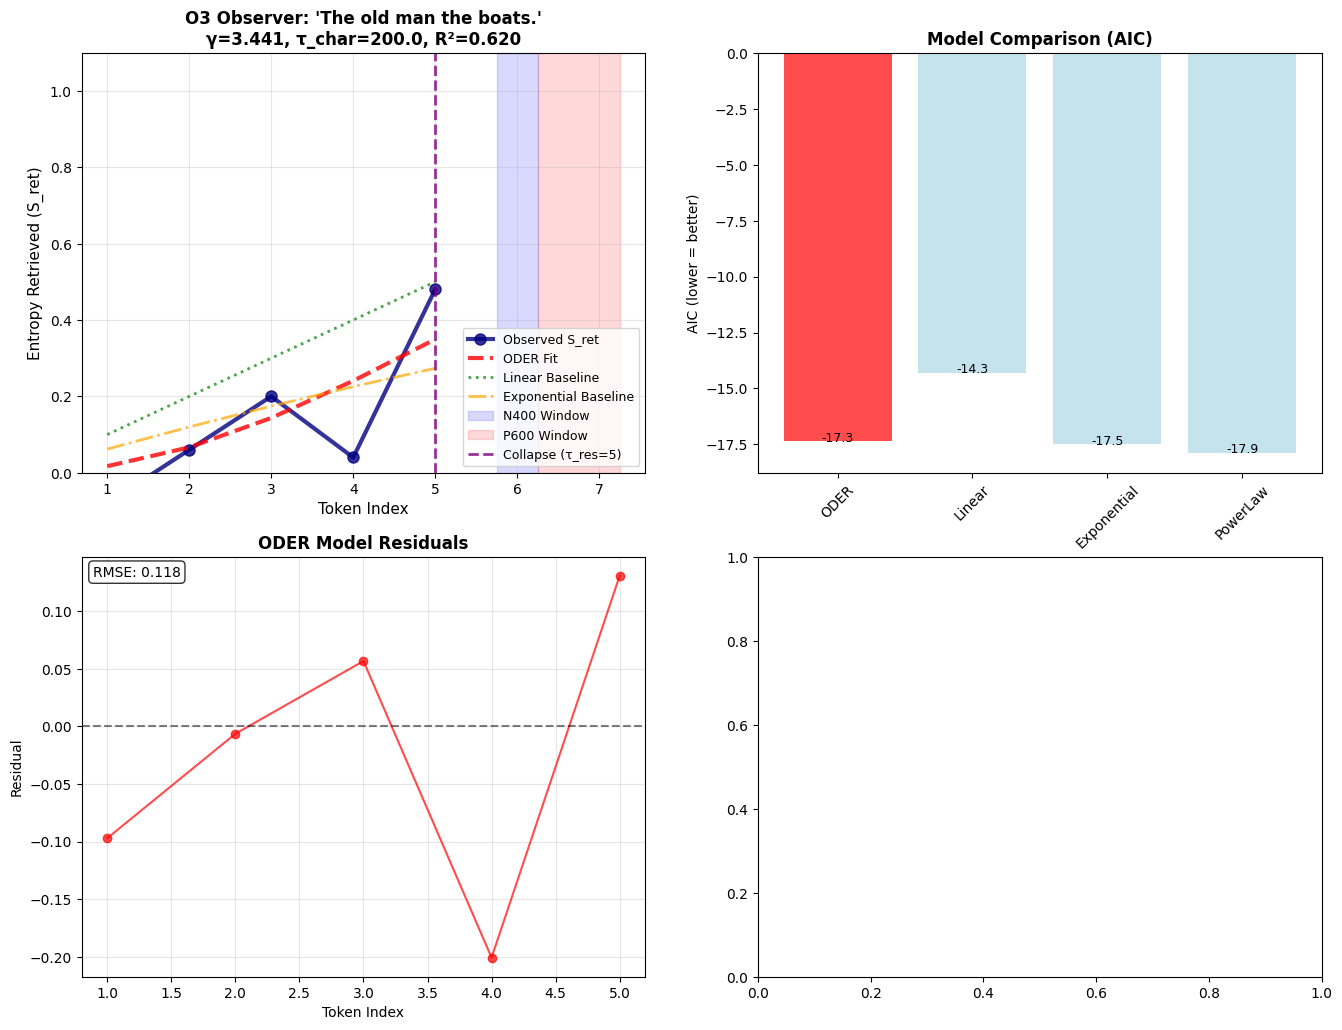

In [22]:
print(f"\n🎨 GENERATING ENHANCED VISUALIZATION:")

# Create comprehensive plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Main entropy retrieval plot
tokens = user_sentence.split()
entropy_trace = generate_realistic_entropy(user_sentence, observer_class, user_language)
S_ret = [1.0 - e for e in entropy_trace]
t = np.arange(1, len(tokens) + 1)

ax1.plot(t, S_ret, 'o-', label='Observed S_ret', linewidth=3, markersize=8, alpha=0.8, color='navy')

if model_results["ODER"]["fit_success"]:
    ax1.plot(t, model_results["ODER"]["fit"], '--', label='ODER Fit', linewidth=3, alpha=0.8, color='red')

if model_results["Linear"]["fit_success"]:
    ax1.plot(t, model_results["Linear"]["fit"], ':', label='Linear Baseline', linewidth=2, alpha=0.7, color='green')

if model_results["Exponential"]["fit_success"]:
    ax1.plot(t, model_results["Exponential"]["fit"], '-.', label='Exponential Baseline', linewidth=2, alpha=0.7, color='orange')

# ERP windows
ax1.axvspan(erp["N400"][0]/400, erp["N400"][1]/400, color='blue', alpha=0.15, label='N400 Window')
ax1.axvspan(erp["P600"][0]/400, erp["P600"][1]/400, color='red', alpha=0.15, label='P600 Window')

# Collapse point
ax1.axvline(collapse_token, color='purple', linestyle='--', alpha=0.8, linewidth=2, label=f'Collapse (τ_res={collapse_token})')

# Enhanced title with parameter info
if model_results["ODER"]["fit_success"]:
    gamma, tau_char = model_results["ODER"]["params"]
    title_text = f"{observer_class} Observer: '{user_sentence[:30]}{'...' if len(user_sentence) > 30 else ''}'\nγ={gamma:.3f}, τ_char={tau_char:.1f}, R²={model_results['ODER']['R²']:.3f}"
else:
    title_text = f"{observer_class} Observer: '{user_sentence[:30]}{'...' if len(user_sentence) > 30 else ''}'\nODER Fit Failed"

ax1.set_title(title_text, fontsize=12, fontweight='bold')
ax1.set_xlabel("Token Index", fontsize=11)
ax1.set_ylabel("Entropy Retrieved (S_ret)", fontsize=11)
ax1.legend(fontsize=9, loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1.1)

# Model comparison (AIC)
model_names = ['ODER', 'Linear', 'Exponential', 'PowerLaw']
aic_values = []
colors = []

for name in model_names:
    if model_results[name]["fit_success"]:
        aic_values.append(model_results[name]["AIC"])
        colors.append('red' if name == 'ODER' and stress_flags else 'green' if name == 'ODER' else 'lightblue')
    else:
        aic_values.append(np.inf)
        colors.append('gray')

# Filter out infinite values for plotting
finite_aic = [(name, aic, color) for name, aic, color in zip(model_names, aic_values, colors) if not np.isinf(aic)]
if finite_aic:
    names, aics, colors = zip(*finite_aic)
    bars = ax2.bar(names, aics, color=colors, alpha=0.7)

    ax2.set_title("Model Comparison (AIC)", fontweight='bold')
    ax2.set_ylabel("AIC (lower = better)")
    ax2.tick_params(axis='x', rotation=45)

    # Add AIC values on bars
    for bar, aic in zip(bars, aics):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(aics)*0.01,
                f'{aic:.1f}', ha='center', va='bottom', fontsize=9)
else:
    ax2.text(0.5, 0.5, "All Model Fits Failed", ha='center', va='center',
            transform=ax2.transAxes, fontsize=14, color='red')
    ax2.set_title("Model Comparison (AIC)")

# Residuals plot
if model_results["ODER"]["fit_success"]:
    residuals = np.array(S_ret) - model_results["ODER"]["fit"]
    ax3.plot(t, residuals, 'o-', color='red', alpha=0.7, markersize=6)
    ax3.axhline(0, color='black', linestyle='--', alpha=0.5)
    ax3.set_title("ODER Model Residuals", fontweight='bold')
    ax3.set_xlabel("Token Index")
    ax3.set_ylabel("Residual")
    ax3.grid(True, alpha=0.3)

    # Add residual statistics
    rmse = np.sqrt(np.mean(residuals**2))
    ax3.text(0.02, 0.98, f'RMSE: {rmse:.3f}', transform=ax3.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
else:
    ax3.text(0.5, 0.5, "ODER Fit Failed\nNo Residuals Available", ha='center', va='center',
            transform=ax3.transAxes, fontsize=12, color='red', fontweight='bold')
    ax3.set_title("ODER Model Residuals")

# Enhanced context and diagnostics
context_text = f"📝 Sentence: '{user_sentence}'\n"
context_text += f"🌍 Language: {user_language}\n"
context_text += f"👤 Observer: {observer_class}\n"
context_text += f"🔢 Tokens: {len(tokens)}\n"

if user_language == "Aurian":
    lhier = calculate_aurian_lhier(user_sentence)
    context_text += f"📊 Lhier Score: {lhier}\n"

context_text += f"🎯 Collapse: Token {collapse_token} ({collapse_method})\n"
context_text += f"🧠 N400: {erp['N400'][0]}-{erp['N400'][1]}ms\n"
context_text += f"🧠 P600: {erp['P600'][0]}-{erp['P600'][1]}ms\n"

if stress_flags:
    context_text += f"⚠️ Stress Flags: {len(stress_flags)}\n"
    context_text += f"   {stress_flags[0][:30]}{'...' if len(stress_flags[0]) > 30 else ''}\n"
else:
    context_text += f"✅ No Stress Flags\n"

if model_results["ODER"]["fit_success"]:
    context_text += f"📈 Model Quality: {model_results['ODER']['R²']:.3f}"
else:
    context_text += f"❌ Model Fit Failed"

ax4.text(0.05, 0.95, context_text, transform=ax4.transAxes, fontsize=10,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')
ax4.set_title("Analysis Summary", fontweight='bold')

plt.tight_layout()

# Save plot with enhanced naming
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"enhanced_playground_{observer_class}_{timestamp}.png"
plt.savefig(plot_filename, dpi=150, bbox_inches='tight')
print(f"   Plot saved: {plot_filename}")

plt.show()

# 17. Session Export (Optional)


In [23]:
if export_session:
	print(f"\n💾 EXPORTING SESSION:")
	export_filename = export_playground_session(
    	user_sentence, model_results, observer_class, user_language
	)



💾 EXPORTING SESSION:

💾 SESSION EXPORT:
   File: playground_session_O3_2025_06_19_19_57.json
   Compatible with main notebook batch analysis
   Contains: parameters, traces, diagnostics, metadata


# 18. Enhanced Example Bank

In [24]:
def load_enhanced_examples():
    """Enhanced example bank with detailed predictions"""
    examples = [
        {
            "text": "The old man the boats.",
            "language": "English",
            "ambig_type": "garden-path",
            "complexity": "high",
            "fun_fact": "O3 observers often fail to treat 'man' as a verb here.",
            "oder_prediction": "Sharp entropy spike at 'fell', high τ_char for O3"
        },
        {
            "text": "Shira verel domi alen rek.",
            "language": "Aurian",
            "ambig_type": "role-switch",
            "complexity": "medium",
            "fun_fact": "Aurian affix '-el' enforces delayed syntactic collapse.",
            "oder_prediction": "Gradual entropy decline, moderate observer separation"
        },
        {
            "text": "The horse raced past the barn fell down.",
            "language": "English",
            "ambig_type": "garden-path",
            "complexity": "very_high",
            "fun_fact": "Classic garden path with reanalysis at 'fell'.",
            "oder_prediction": "Massive entropy spike at token 7, extreme O1/O3 separation"
        },
        {
            "text": "Buffalo buffalo buffalo buffalo buffalo.",
            "language": "English",
            "ambig_type": "lexical_recursion",
            "complexity": "extreme",
            "fun_fact": "This is a deliberate entropy bomb—ODER should break here.",
            "oder_prediction": "Model failure expected, extreme stress flags"
        },
        {
            "text": "The student the professor liked passed the exam.",
            "language": "English",
            "ambig_type": "center_embedding",
            "complexity": "high",
            "fun_fact": "Center embedding creates processing difficulty.",
            "oder_prediction": "High τ_char, delayed collapse, strong observer effects"
        },
        {
            "text": "Colorless green ideas sleep furiously.",
            "language": "English",
            "ambig_type": "semantic_anomaly",
            "complexity": "anomalous",
            "fun_fact": "Chomsky's famous semantically anomalous sentence.",
            "oder_prediction": "Flat entropy profile, poor ODER fit expected"
        }
    ]
    return examples

def demonstrate_example(example_name):
    """Load and analyze a specific example"""
    examples = load_enhanced_examples()

    # Find example
    example = None
    for ex in examples:
        if example_name.lower() in ex["text"].lower():
            example = ex
            break

    if not example:
        print(f"❌ Example '{example_name}' not found")
        return

    print(f"\n🎯 EXAMPLE DEMONSTRATION: {example['text']}")
    print("=" * 60)
    print(f"📝 Text: '{example['text']}'")
    print(f"🏷️ Type: {example['ambig_type']}")
    print(f"📊 Complexity: {example['complexity']}")
    print(f"💡 Insight: {example['fun_fact']}")
    print(f"🔮 ODER Prediction: {example['oder_prediction']}")

    # Run analysis on this example
    global user_sentence, user_language
    original_sentence = user_sentence
    original_language = user_language

    user_sentence = example["text"]
    user_language = example["language"]

    print(f"\n🚀 Running analysis...")
    example_results = run_enhanced_playground_analysis()

    # Restore original settings
    user_sentence = original_sentence
    user_language = original_language

    return example_results

# 19. Final Summary and Recommendations

In [25]:
print(f"\n" + "="*60)
print(f"🎯 ENHANCED PLAYGROUND ANALYSIS COMPLETE")
print(f"="*60)

print(f"\n📊 RESULTS SUMMARY:")
if model_results["ODER"]["fit_success"]:
	gamma, tau_char = model_results["ODER"]["params"]
	print(f"   ✅ ODER fit successful")
	print(f"   📈 Quality: R² = {model_results['ODER']['R²']:.3f}")
	print(f"   ⚡ Retrieval: γ = {gamma:.3f}")
	print(f"   🕐 Processing: τ_char = {tau_char:.1f}")
	print(f"   🎯 Collapse: Token {collapse_token}")
else:
	print(f"   ❌ ODER fit failed")

print(f"\n🧪 VALIDATION STATUS:")
if not stress_flags:
	print(f"   ✅ All validation checks passed")
	print(f"   🏆 Robust ODER demonstration")
else:
	print(f"   ⚠️ {len(stress_flags)} validation issues detected")
	print(f"   🔧 See stress test results for details")

print(f"\n💡 NEXT STEPS:")
print(f"   1. 🔄 Try different sentences to explore parameter space")
print(f"   2. 👥 Use comparison mode to see observer differences")
print(f"   3. 📚 Load examples with demonstrate_example('keyword')")
print(f"   4. 📊 Export sessions for batch analysis in main notebook")
print(f"   5. 🎨 Examine residual plots for model validation")

print(f"\n🚀 ODER Interactive Playground Ready!")
print(f"📖 Available functions:")
print(f"   - run_observer_comparison(sentence, language)")
print(f"   - demonstrate_example('keyword')")
print(f"   - export_playground_session(...)")
print(f"   - comprehensive_stress_test(...)")

# Example usage prompts
print(f"\n💡 QUICK START EXAMPLES:")
print(f"   # Compare observers:")
print(f"   comparison_results = run_observer_comparison('The old man the boats.')")
print(f"   ")
print(f"   # Try a classic example:")
print(f"   demonstrate_example('buffalo')")
print(f"   ")
print(f"   # Test garden path:")
print(f"   demonstrate_example('horse raced')")



🎯 ENHANCED PLAYGROUND ANALYSIS COMPLETE

📊 RESULTS SUMMARY:
   ✅ ODER fit successful
   📈 Quality: R² = 0.620
   ⚡ Retrieval: γ = 3.441
   🕐 Processing: τ_char = 200.0
   🎯 Collapse: Token 5

🧪 VALIDATION STATUS:
   ⚠️ 3 validation issues detected
   🔧 See stress test results for details

💡 NEXT STEPS:
   1. 🔄 Try different sentences to explore parameter space
   2. 👥 Use comparison mode to see observer differences
   3. 📚 Load examples with demonstrate_example('keyword')
   4. 📊 Export sessions for batch analysis in main notebook
   5. 🎨 Examine residual plots for model validation

🚀 ODER Interactive Playground Ready!
📖 Available functions:
   - run_observer_comparison(sentence, language)
   - demonstrate_example('keyword')
   - export_playground_session(...)
   - comprehensive_stress_test(...)

💡 QUICK START EXAMPLES:
   # Compare observers:
   comparison_results = run_observer_comparison('The old man the boats.')
   
   # Try a classic example:
   demonstrate_example('buffalo')
   